In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('combined_data_cleaned.csv')

In [3]:
data.head()

,date,state,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations_per_million,share_doses_used,fips,cases,deaths
0,2020-01-21,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1,0
1,2020-01-22,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1,0
2,2020-01-23,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1,0
3,2020-01-24,Illinois,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,1,0
4,2020-01-24,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1,0


In [4]:
data.tail()

,date,state,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations_per_million,share_doses_used,fips,cases,deaths
26354,2021-06-24,Virginia,9109659.0,10259795.0,4995493.0,50.83,106.73,4338863.0,58.53,120.20,28094.0,3378.0,0.888,51,679330,11378
26355,2021-06-24,Washington,8408738.0,9332975.0,4603331.0,53.32,110.42,4060008.0,60.45,122.56,23697.0,3136.0,0.901,53,451560,5939
26356,2021-06-24,West Virginia,1397783.0,1879415.0,769962.0,36.70,77.99,657655.0,42.96,104.87,3687.0,1966.0,0.744,54,163744,2876
26357,2021-06-24,Wisconsin,5808243.0,6076435.0,3097135.0,48.18,99.76,2805172.0,53.19,104.36,11148.0,1949.0,0.956,55,677398,8092
26358,2021-06-24,Wyoming,415449.0,513455.0,224440.0,33.81,71.78,195677.0,38.78,88.72,93.0,1275.0,0.809,56,61847,740


In [5]:
data.date = pd.to_datetime(data.date)

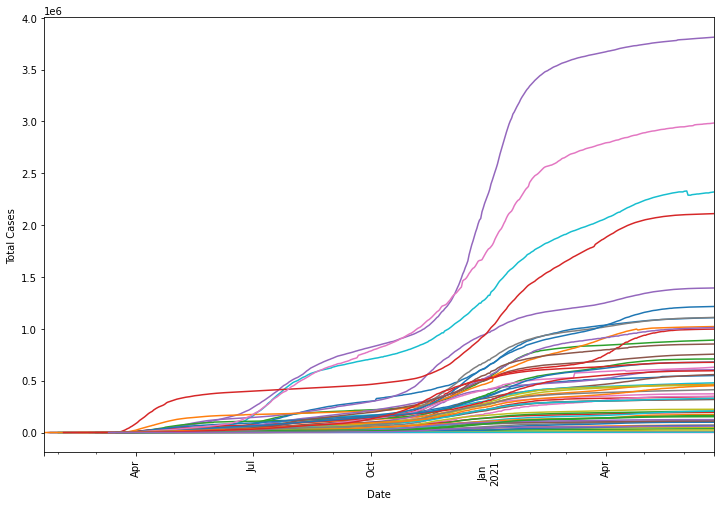

In [6]:
#cumulative cases grouped by state

fig, ax = plt.subplots(figsize=(12,8))
_ = data.groupby('state').plot(x='date', y='cases', ax=ax)
_ = plt.xlabel('Date')
_ = plt.ylabel('Total Cases')
_ = plt.xticks(rotation=90)
ax.get_legend().remove()

plt.show()

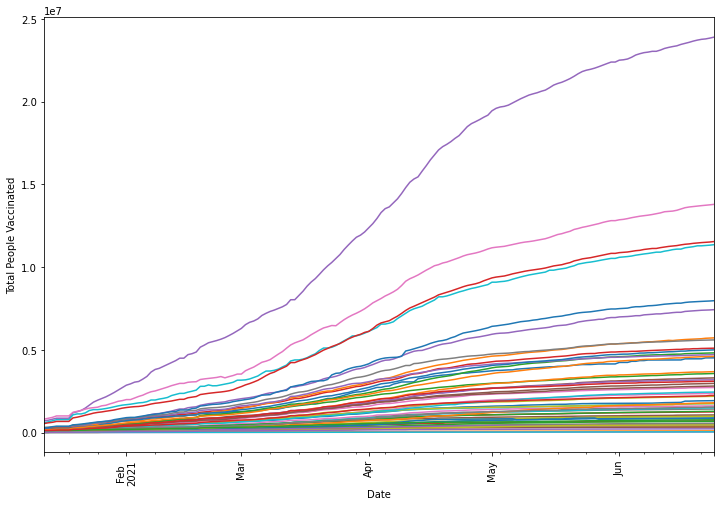

In [7]:
#total people vaccinated grouped by state

fig, ax = plt.subplots(figsize=(12,8))
_ = data.iloc[data.people_vaccinated.first_valid_index():].groupby('state').plot(x='date', y='people_vaccinated', ax=ax)
_ = plt.xlabel('Date')
_ = plt.ylabel('Total People Vaccinated')
_ = plt.xticks(rotation=90)
ax.get_legend().remove()

plt.show()

In [8]:
#add new column with number of new cases per day

data['new_cases'] = data.groupby('state').diff(periods=1).cases

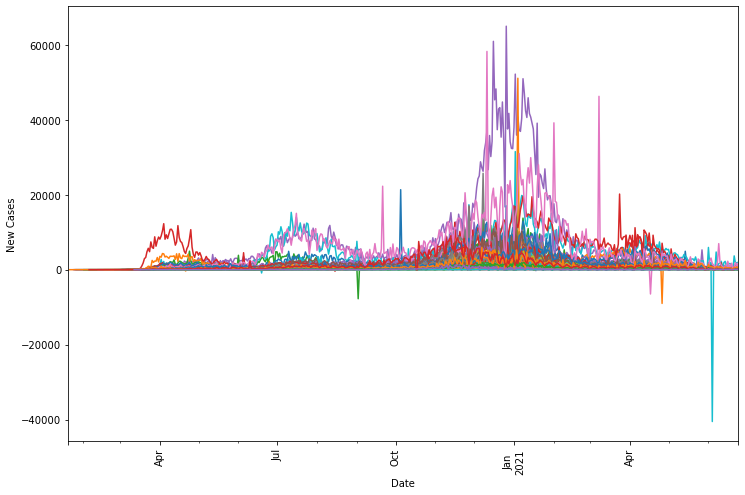

In [9]:
#new cases grouped by state

fig, ax = plt.subplots(figsize=(12,8))
_ = data.groupby('state').plot(x='date', y='new_cases', ax=ax)
_ = plt.xlabel('Date')
_ = plt.ylabel('New Cases')
_ = plt.xticks(rotation=90)
ax.get_legend().remove()

plt.show()

In [10]:
data[data['new_cases'] < 0]

,date,state,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations_per_million,share_doses_used,fips,cases,deaths,new_cases
2224,2020-04-12,Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,12103,438,-158.0
2750,2020-04-21,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,915,43,-337.0
3382,2020-05-03,Idaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,2059,64,-2.0
4426,2020-05-22,Hawaii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,632,17,-5.0
4669,2020-05-26,North Dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,2422,54,-35.0
4695,2020-05-27,Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,41288,3803,-15.0
5973,2020-06-19,Louisiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,48627,3084,-879.0
7635,2020-07-19,New Jersey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,178757,15706,-31.0
7941,2020-07-25,Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,14175,579,-27.0
8868,2020-08-10,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,3042,28,-8.0


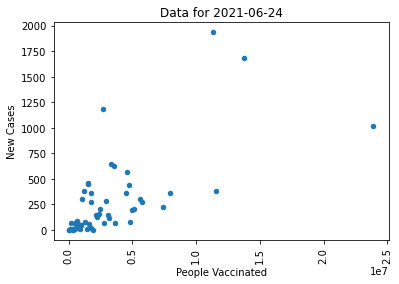

In [11]:
#scatter plot of one day's data

fig, ax = plt.subplots()
_ = data.loc[data['date'] == '2021-06-24'].plot(x='people_vaccinated', y='new_cases', kind='scatter', ax=ax)
_ = plt.title('Data for 2021-06-24')
_ = plt.xlabel('People Vaccinated')
_ = plt.ylabel('New Cases')
_ = plt.xticks(rotation=90)

plt.show()

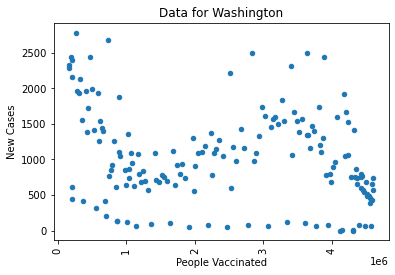

In [12]:
#scatter plot of one state's data [people vaccinated to new cases]

fig, ax = plt.subplots()
_ = data.loc[data['state'] == 'Washington'].plot(x='people_vaccinated', y='new_cases', kind='scatter', ax=ax)
_ = plt.title('Data for Washington')
_ = plt.xlabel('People Vaccinated')
_ = plt.ylabel('New Cases')
_ = plt.xticks(rotation=90)

plt.show()

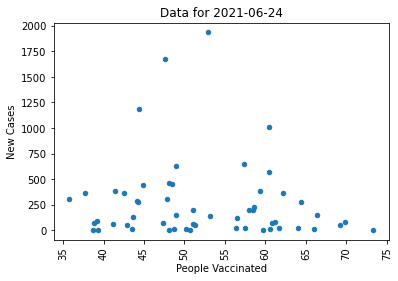

In [13]:
#scatter plot of one day's data - people vaccinated per 100

fig, ax = plt.subplots()
_ = data.loc[data['date'] == '2021-06-24'].plot(x='people_vaccinated_per_hundred', y='new_cases', kind='scatter', ax=ax)
_ = plt.title('Data for 2021-06-24')
_ = plt.xlabel('People Vaccinated')
_ = plt.ylabel('New Cases')
_ = plt.xticks(rotation=90)

plt.show()

<AxesSubplot:>

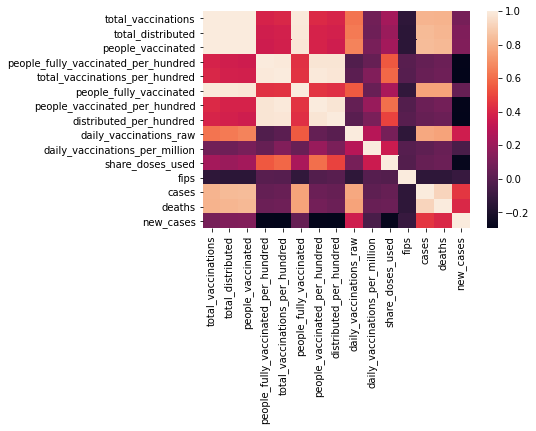

In [14]:
sns.heatmap(data.corr())

In [15]:
#add new column with number of new deaths per day

data['new_deaths'] = data.groupby('state').diff(periods=1).deaths

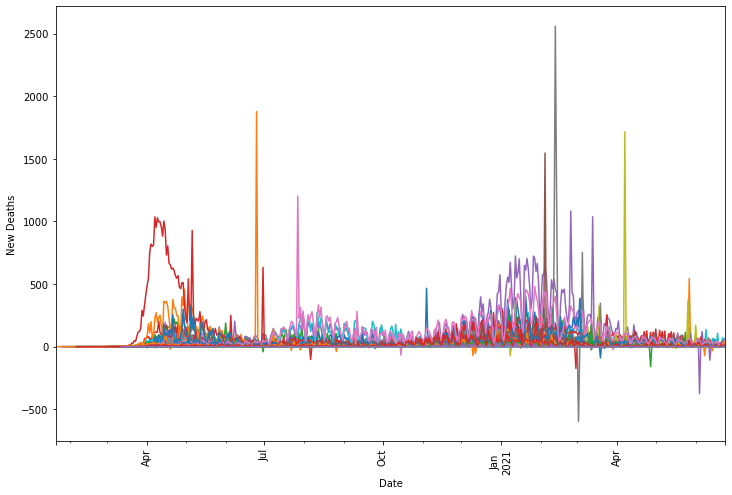

In [16]:
#new deaths grouped by state

fig, ax = plt.subplots(figsize=(12,8))
_ = data.groupby('state').plot(x='date', y='new_deaths', ax=ax)
_ = plt.xlabel('Date')
_ = plt.ylabel('New Deaths')
_ = plt.xticks(rotation=90)
ax.get_legend().remove()

plt.show()

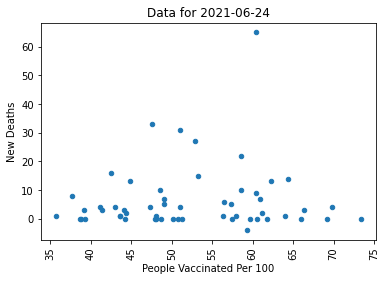

In [17]:
#scatter plot of one day's data - people vaccinated per 100 to new deaths

fig, ax = plt.subplots()
_ = data.loc[data['date'] == '2021-06-24'].plot(x='people_vaccinated_per_hundred', y='new_deaths', kind='scatter', ax=ax)
_ = plt.title('Data for 2021-06-24')
_ = plt.xlabel('People Vaccinated Per 100')
_ = plt.ylabel('New Deaths')
_ = plt.xticks(rotation=90)

plt.show()